In [217]:
from importlib import reload
import dataclasses
import jax
from jax import tree_util
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as onp
import optax
import time

from fmmax import basis, fmm

from totypes import types
from invrs_gym.challenge.diffract import metagrating_challenge, splitter_challenge
from invrs_gym.challenge.extractor import challenge, component

In [332]:
from invrs_gym.utils import optimizer
reload(optimizer)


def optimize(challenge, opt, num_steps, response_kwargs={}, use_jit=True):
    params, state, step_fn = optimizer.setup_optimization(
        challenge=challenge, optimizer=opt, response_kwargs=response_kwargs
    )
    if use_jit:
        step_fn = jax.jit(step_fn)

    loss_values = []
    metrics_values = []
    for i in range(num_steps):
        try:
            t0 = time.time()
            params, state, (value, response, aux, metrics) = step_fn(params, state)
            print(f"step {i} ({time.time() - t0:.2f}s): loss={value}")
            loss_values.append(value)
            metrics_values.append(metrics)
        except KeyboardInterrupt:
            print("Terminating optimization")
            break
        except Exception as e:
            if "KeyboardInterrupt" in str(e):
                print("Terminating optimization")
                break
            else:
                raise e

    return params, response, aux, loss_values, metrics_values

In [ ]:
(
    metagrating_params,
    metagrating_response,
    metagrating_aux,
    metagrating_loss_values,utils
    metagrating_metrics_values
) = optimize(
    metagrating_challenge.metagrating(),
    opt=optax.adam(0.02),
    num_steps=200,
)

plt.figure(figsize=(8, 5))
plt.subplot(121)
plt.plot(metagrating_loss_values)
plt.plot([m["distance_to_window"] for m in metagrating_metrics_values])
plt.subplot(122)
plt.imshow(jnp.tile(metagrating_params.array, (1, 1)))
plt.colorbar()

step 0 (22.35s): loss=1.0
step 1 (14.16s): loss=1.0
step 2 (13.92s): loss=0.9999991655349731
step 3 (14.23s): loss=0.9996301531791687
step 4 (16.02s): loss=0.998212993144989
step 5 (14.15s): loss=0.9951361417770386
step 6 (13.98s): loss=0.9899565577507019
step 7 (14.01s): loss=0.9822525382041931
step 8 (13.76s): loss=0.9715893268585205
step 9 (14.10s): loss=0.9575342535972595
step 10 (14.06s): loss=0.9397274255752563
step 11 (14.21s): loss=0.917992353439331
step 12 (13.91s): loss=0.8924805521965027
step 13 (14.96s): loss=0.8638017177581787
step 14 (14.12s): loss=0.8331493139266968
step 15 (14.02s): loss=0.8022722601890564
step 16 (14.41s): loss=0.7732352614402771
step 17 (14.19s): loss=0.7473592162132263
step 18 (14.07s): loss=0.7239526510238647
step 19 (13.67s): loss=0.7012132406234741
step 20 (14.41s): loss=0.6778368949890137
step 21 (14.57s): loss=0.6526209115982056
step 22 (14.58s): loss=0.623977780342102
step 23 (15.01s): loss=0.5903396606445312
step 24 (17.64s): loss=0.5509189963

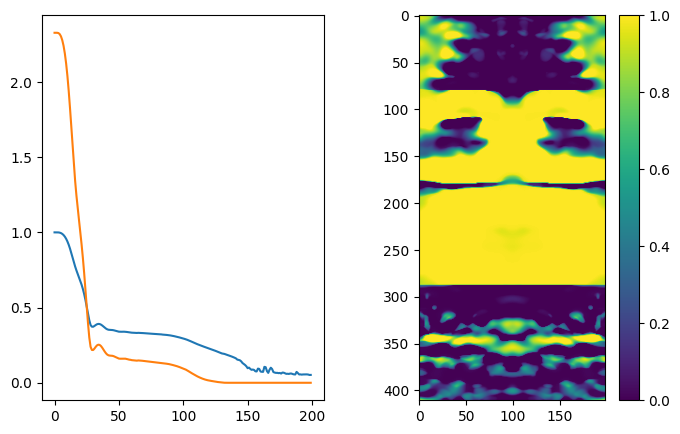

In [334]:
reload(metagrating_challenge)

(
    broadband_metagrating_params,
    broadband_metagrating_response,
    broadband_metagrating_aux,
    broadband_metagrating_loss_values,
    broadband_metagrating_metrics_values
) = optimize(
    metagrating_challenge.broadband_metagrating(),
    opt=optax.adam(0.02),
    num_steps=200,
)

plt.figure(figsize=(8, 5))
plt.subplot(121)
plt.plot(broadband_metagrating_loss_values)
plt.plot([m["distance_to_window"] for m in broadband_metagrating_metrics_values])
plt.subplot(122)
plt.imshow(jnp.tile(broadband_metagrating_params.array, (1, 1)))
plt.colorbar()

In [ ]:
(
    splitter_params,
    splitter_response,
    splitter_aux,
    splitter_loss_values,
    splitter_metrics_values
) = optimize(
    splitter_challenge.diffractive_splitter(),
    opt=optax.adam(0.02),
    num_steps=100,
)

thickness=1.0346357822418213
average_efficiency=0.01628880761563778
total_efficiency=0.7981516122817993
uniformity_error=0.1578393429517746
uniformity_error_without_zeroth_order=0.08096884936094284
zeroth_order_efficiency=0.020380349829792976
zeroth_order_error=0.2511873245239258


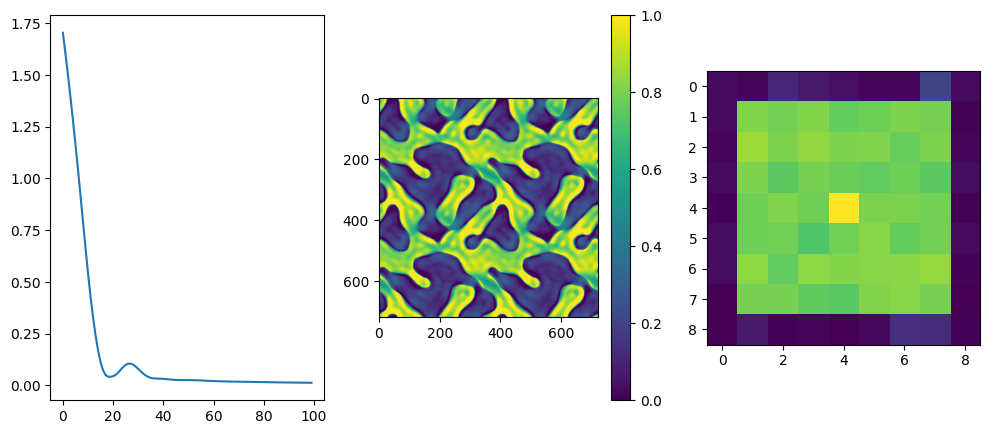

In [321]:
print(f"thickness={splitter_params['thickness'].array}")
for key, value in splitter_metrics_values[-1].items():
    print(f"{key}={value}")

plt.figure(figsize=(12, 5))
plt.subplot(131)
plt.plot(splitter_loss_values)
plt.subplot(132)
plt.imshow(jnp.tile(splitter_params["density"].array, (2, 2)))

plt.subplot(133)
plt.imshow(splitter_challenge.extract_orders_for_splitting(
    splitter_response.transmission_efficiency,
    splitter_response.expansion,
    (9, 9),
))

In [435]:
pec = challenge.photon_extractor()

(
    extractor_params,
    extractor_response,
    extractor_aux,
    extractor_loss_values,
    extractor_metrics_values
) = optimize(challenge=pec, opt=optax.adam(0.02), num_steps=100)

_, extractor_aux = pec.component.response(extractor_params, compute_fields=True)

step 0 (100.22s): loss=-2.5668482780456543
step 1 (82.60s): loss=-3.6856534481048584
step 2 (82.22s): loss=-4.738874435424805
step 3 (83.13s): loss=-5.893636226654053
step 4 (82.96s): loss=-7.113936424255371
step 5 (83.71s): loss=-8.368627548217773
step 6 (82.80s): loss=-9.6292724609375
step 7 (91.13s): loss=-10.866592407226562
step 8 (80.99s): loss=-12.049121856689453
step 9 (82.68s): loss=-13.143511772155762
step 10 (83.49s): loss=-14.127196311950684
step 11 (82.81s): loss=-14.991838455200195
step 12 (81.78s): loss=-15.754806518554688
step 13 (83.72s): loss=-16.450031280517578
step 14 (81.98s): loss=-17.111431121826172
step 15 (82.82s): loss=-17.745609283447266
step 16 (84.36s): loss=-18.31903076171875
step 17 (81.75s): loss=-18.77389907836914
step 18 (81.92s): loss=-19.07178497314453
step 19 (82.26s): loss=-19.237184524536133
step 20 (82.26s): loss=-19.35015869140625
step 21 (81.70s): loss=-19.46680450439453
step 22 (82.67s): loss=-19.620546340942383
step 23 (81.53s): loss=-19.83030

ExtractorResponse(wavelength=Array(0.637, dtype=float32, weak_type=True), emitted_power=Array([ 90.95079 ,  90.951004, 113.07983 ], dtype=float32), extracted_power=Array([32.729595, 32.73461 , 32.484596], dtype=float32), collected_power=Array([30.263613, 30.270285, 27.762966], dtype=float32))


(-0.5, 279.5, 279.5, -0.5)

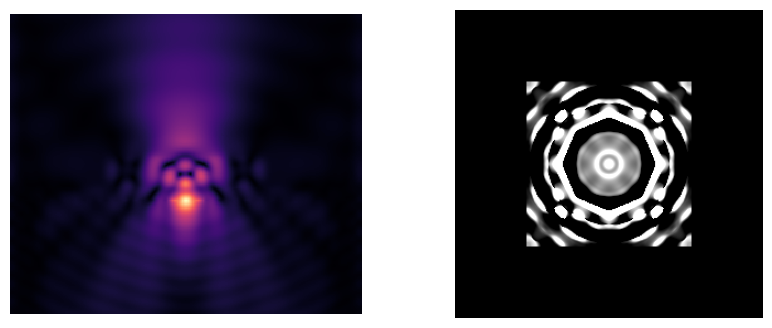

In [437]:
x, y, z = extractor_aux["field_coordinates"]
ex, ey, ez = extractor_aux["efield"]

print(extractor_response)

plt.figure(figsize=(10, 4))
xplot, zplot = jnp.meshgrid(x, z, indexing="ij")
field_plot = jnp.sqrt(jnp.abs(ex)**2 + jnp.abs(ey)**2 + jnp.abs(ez)**2)
ax = plt.subplot(121)
plt.pcolormesh(xplot, zplot, field_plot[:, :, 1], cmap="magma")
ax.axis("equal")
ax.axis("off")
ax.set_ylim(ax.get_ylim()[::-1])

ax = plt.subplot(122)
plt.imshow(extractor_params.array, cmap="gray")
ax.axis("off")

In [341]:
print(extractor_aux[0])

ExtractorResponse(wavelength=Array(0.637, dtype=float32, weak_type=True), emitted_power=Array([79.25759, 79.25693, 82.25954], dtype=float32), extracted_power=Array([18.35493  , 18.35263  ,  3.2940438], dtype=float32), collected_power=Array([15.31768  , 15.318352 ,  1.9640553], dtype=float32))


91


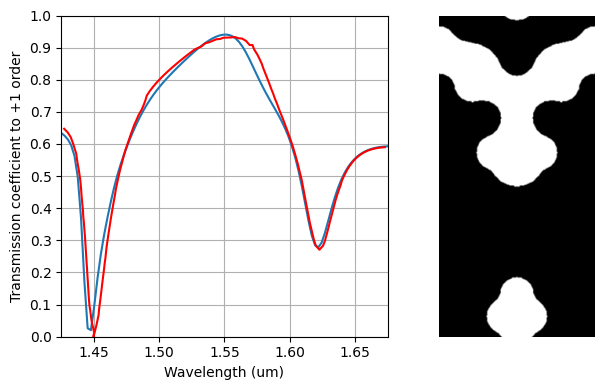

In [541]:
# Jones direct, parallelogramic, 81

# path = "../../../../Desktop/broadband_metagrating.png"

# im = onp.asarray(Image.open(path), dtype=float)
# im = onp.mean(im, axis=-1)


# # Trim the "obviously border" pixels.
# design = im
# design = design[113:553, 144:1056]

# # Remove the text and normalize.
# design -= onp.percentile(design, 5)
# design[:100, 500:800] = 0.0
# design /= onp.percentile(design, 95)
# design[185:250, 200:455] = 1.0
# design = onp.clip(design, 0, 1)

# # Remove tick marks.
# design[:20, 90:120] = 1.0
# design[-20:, 90:120] = 1.0
# design[210:225, :10] = 1.0
# design[210:225, -10:] = 1.0
# design[:20, 200:] = 0.0
# design[-20:, 200:] = 0.0
# design[:150, :20] = 0.0
# design[:150, -20:] = 0.0
# design[-150:, :20] = 0.0
# design[-150:, -20:] = 0.0

# print(design.shape[1] / design.shape[0])
# print(411 / 199)

# # Zoom to achieve the specified output shape.
# design_shape = (199 * 3, 411 * 3)
# zoom = (design_shape[0] / design.shape[0], design_shape[1] / design.shape[1])
# design = ndimage.zoom(design, zoom, order=3)

# design_shape = (199, 411)
# zoom = (design_shape[0] / design.shape[0], design_shape[1] / design.shape[1])
# design = ndimage.zoom(design, zoom, order=1)

# design = design * 1.05 - 0.025
# design = onp.clip(design, 0, 1)
# density_array = design.T

##########

comp = metagrating_challenge.broadband_metagrating(
    sim_params=dataclasses.replace(
        metagrating_challenge.BROADBAND_METAGRATING_SIM_PARAMS,
        approximate_num_terms=81,
        formulation=fmm.Formulation.JONES_DIRECT,
        truncation=basis.Truncation.PARALLELOGRAMIC,
    ),
    spec=dataclasses.replace(
        metagrating_challenge.BROADBAND_METAGRATING_SPEC,
        thickness_grating=0.528,
    ),
).component
density = comp.init(jax.random.PRNGKey(0))
print(comp.expansion.num_terms)

density_array = onp.genfromtxt("../tests/challenge/diffract/broadband_metagrating_designs/device1.csv", delimiter=",")
assert density.shape == density_array.shape
density = dataclasses.replace(density, array=density_array)

response, _ = comp.response(density, wavelength=jnp.linspace(1.425, 1.675, 100))

plt.figure(figsize=(7, 4))
efficiency = metagrating_challenge._value_for_order(response.transmission_efficiency, response.expansion, (1, 0))
ax = plt.subplot(121)
plt.plot(response.wavelength, efficiency)
plt.plot(reference_data[:, 0] / 1000, reference_data[:, 1], 'r')
ax.set_ylim([0, 1])
ax.set_xlim([1.425, 1.675])
ax.set_yticks(onp.arange(0, 1.1, 0.1))
ax.set_xlabel("Wavelength (um)")
ax.set_ylabel("Transmission coefficient to +1 order")
ax.grid(True)
ax = plt.subplot(122)
plt.imshow(density_array, cmap="gray")
ax.axis("off")

plt.tight_layout()

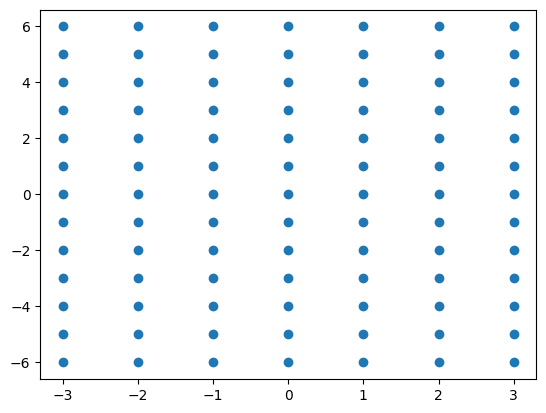

In [544]:
plt.plot(comp.expansion.basis_coefficients[:, 1], comp.expansion.basis_coefficients[:, 0], 'o')